In [18]:
library('igraph')
packageVersion("igraph")

library("Hmisc")
packageVersion("Hmisc")

library("RColorBrewer")
packageVersion("RColorBrewer")

library("psych")
packageVersion("psych")

library("corrplot")
packageVersion("corrplot")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] ‘1.2.4.1’

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



[1] ‘4.2.0’

[1] ‘1.1.2’


Attaching package: ‘psych’

The following object is masked from ‘package:Hmisc’:

    describe

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



[1] ‘1.8.12’

corrplot 0.84 loaded


[1] ‘0.84’

## Relative, MDF

In [6]:
rel.mdf = read.csv("rel-mdf-otu.csv", header = TRUE)
mdf.taxa = read.csv("mdf-taxa.csv", header = TRUE)

In [7]:
rownames(rel.mdf) = rel.mdf$X
rel.mdf = rel.mdf[, 2:15]

In [9]:
rownames(mdf.taxa) = mdf.taxa$X
mdf.taxa = mdf.taxa[, 2:8]

In [11]:
rel.mdf

,T1R1,T1R4,T2R1,T2R4,T2R5,T3R1,T3R4,T3R5,T4R1,T4R4,T4R5,T5R1,T5R4,T5R5
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SH1726759.08FU_AF444541_refs,0,0,0.0000000,0.00000000,0.00000000,0.031587022,0.0000000,0.01479859,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000
SH1725251.08FU_KJ706901_reps,0,0,0.1112274,0.00000000,0.00000000,0.527954515,0.0000000,0.00000000,0.21796490,0.00000000,0.000000000,0.14520227,0.00000000,0.00000000
SH1674913.08FU_AJ244232_refs,0,0,0.3205967,0.00000000,0.00000000,0.126348089,0.0000000,0.00000000,0.02581163,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000
SH1676198.08FU_KF984792_refs,0,0,0.0000000,0.00000000,0.03575771,0.000000000,0.0000000,0.01479859,0.00000000,0.03041247,0.000000000,0.00000000,0.05990633,0.01263743
SH1694434.08FU_EU037063_reps,0,0,0.0000000,0.00000000,0.00000000,0.009024863,0.0000000,0.00000000,0.01433980,0.00000000,0.008488724,0.00000000,0.00000000,0.00000000
SH1692811.08FU_FJ430773_reps,100,0,62.8827532,43.16169236,57.49839090,50.629484229,37.5676204,16.75792465,29.27899507,44.55806881,13.726266942,42.46763199,46.33482191,13.43674965
SH1695393.08FU_U65307_reps,0,100,27.9507982,47.24171860,25.67403275,38.648977934,57.8309327,71.80572410,55.39463118,49.40125451,82.521716986,20.66309039,36.98943470,84.40540882
SH1685996.08FU_AJ292429_refs,0,0,0.0000000,0.00000000,0.00000000,0.000000000,0.0000000,0.00000000,0.01433980,0.00000000,0.000000000,0.01613359,0.00000000,0.00000000
SH1738712.08FU_MG372138_reps,0,0,0.0000000,5.01147917,2.81770722,0.000000000,2.8807925,0.38180365,0.00000000,0.53982133,2.719221301,0.00000000,0.32676179,0.62555289


In [14]:
# log10(x+1) transformation
rel.mdf = log10(rel.mdf + 1)

In [15]:
# combine feature table with taxonomy
rel.mdf.w.taxa = cbind(rel.mdf, mdf.taxa)

In [16]:
rel.mdf.w.taxa

,T1R1,T1R4,T2R1,T2R4,T2R5,T3R1,T3R4,T3R5,T4R1,T4R4,⋯,T5R1,T5R4,T5R5,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
SH1726759.08FU_AF444541_refs,0.000000,0.000000,0.00000000,0.00000000,0.00000000,0.013505870,0.00000000,0.006379856,0.000000000,0.000000000,⋯,0.000000000,0.00000000,0.000000000,k__Fungi,p__Basidiomycota,c__Microbotryomycetes,o__Sporidiobolales,f__Sporidiobolaceae,g__Rhodotorula,NA
SH1725251.08FU_KJ706901_reps,0.000000,0.000000,0.04580295,0.00000000,0.00000000,0.184110426,0.00000000,0.000000000,0.085634771,0.000000000,⋯,0.058882202,0.00000000,0.000000000,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Filobasidiales,f__Filobasidiaceae,g__Naganishia,NA
SH1674913.08FU_AJ244232_refs,0.000000,0.000000,0.12077021,0.00000000,0.00000000,0.051672627,0.00000000,0.000000000,0.011067620,0.000000000,⋯,0.000000000,0.00000000,0.000000000,k__Fungi,p__Ascomycota,c__Dothideomycetes,o__Dothideales,f__Aureobasidiaceae,g__Aureobasidium,NA
SH1676198.08FU_KF984792_refs,0.000000,0.000000,0.00000000,0.00000000,0.01525817,0.000000000,0.00000000,0.006379856,0.000000000,0.013011105,⋯,0.000000000,0.02526749,0.005453977,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Trichocomaceae,g__Talaromyces,NA
SH1694434.08FU_EU037063_reps,0.000000,0.000000,0.00000000,0.00000000,0.00000000,0.003901868,0.00000000,0.000000000,0.006183465,0.000000000,⋯,0.000000000,0.00000000,0.000000000,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Thermoascaceae,g__Byssochlamys,NA
SH1692811.08FU_FJ430773_reps,2.004321,0.000000,1.80538363,1.64504571,1.76714392,1.712897787,1.58622284,1.249392209,1.481141457,1.658565306,⋯,1.638165982,1.67518075,1.159469425,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Penicillium,NA
SH1695393.08FU_U65307_reps,0.000000,2.004321,1.46166054,1.68342277,1.42608868,1.598231997,1.76960573,1.862165526,1.751237761,1.702441346,⋯,1.335720412,1.57966283,1.931485376,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Aspergillus,NA
SH1685996.08FU_AJ292429_refs,0.000000,0.000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.000000000,0.006183465,0.000000000,⋯,0.006950806,0.00000000,0.000000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Cordycipitaceae,g__Lecanicillium,NA
SH1738712.08FU_MG372138_reps,0.000000,0.000000,0.00000000,0.77898135,0.58180262,0.000000000,0.58892043,0.140446336,0.000000000,0.187470330,⋯,0.000000000,0.12279296,0.211001104,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Hypocreaceae,g__Trichoderma,NA


In [19]:
# Pearson correlation
cor.rel.mdf = rcorr(t(rel.mdf), type='pearson')

In [20]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices.r.m = which(abs(cor.rel.mdf$r) > 0.3 & cor.rel.mdf$P < 0.05 & lower.tri(cor.rel.mdf$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.r.m.by.row = indices.r.m[order(indices.r.m[,1]),]

sig.rel.mdf = cor.rel.mdf$r[indices.r.m.by.row]
length(sig.rel.mdf)

[1] 15

In [21]:
sig.rel.mdf

[1]  0.7301434  0.6277869 -0.5735037  0.8994349  0.7591026  0.5567279
 [7]  0.9433940  0.9124377  0.9670584  0.8352804  0.9754478  0.8498938
[13]  0.8557209  0.5488031  0.7122531

In [22]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.rel.mdf$r[which(abs(cor.rel.mdf$r) <= 0.3 & lower.tri(cor.rel.mdf$r), arr.ind=TRUE)]=0
cor.rel.mdf$r[which(cor.rel.mdf$P >= 0.05 & lower.tri(cor.rel.mdf$r), arr.ind=TRUE)]=0

In [23]:
# show vertex label in Genus level
v.names.r.m = as.vector(rel.mdf.w.taxa[,20])

In [24]:
# color vertex according to Order level
colourCount = length(unique(rel.mdf.w.taxa[,18]))
getPalette = colorRampPalette(brewer.pal(8, "Set2"))
col.r.m = getPalette(colourCount)
my_color.r.m = col.r.m[as.numeric(as.factor(rel.mdf.w.taxa[,18]))]

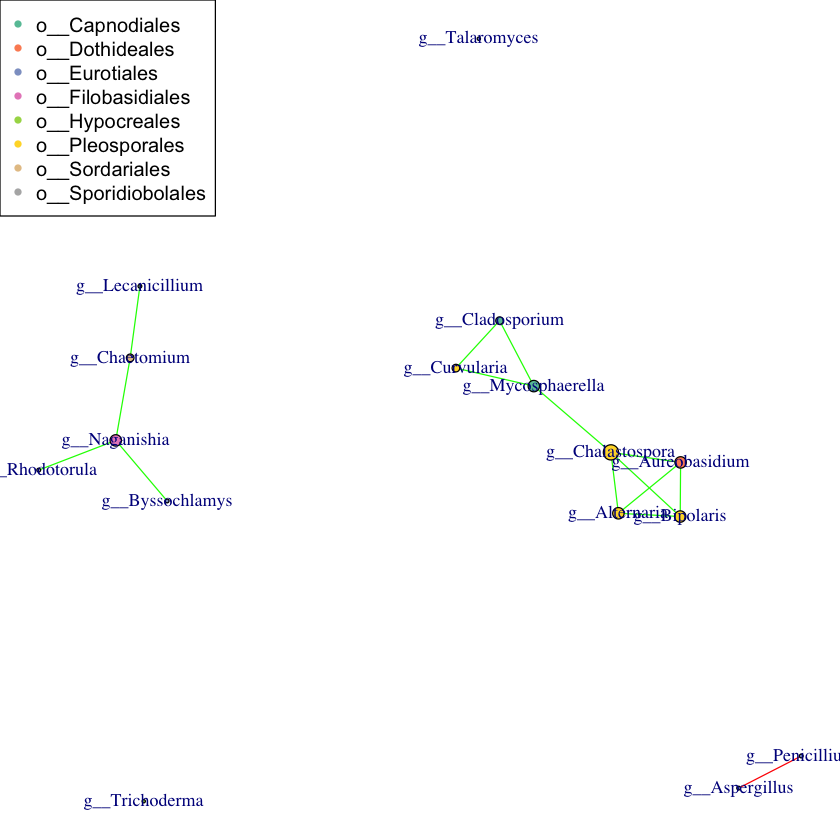

In [25]:
# create network graph from correlation matrix
nw.rel.mdf <- graph_from_adjacency_matrix(cor.rel.mdf$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.rel.mdf)$name = v.names.r.m
V(nw.rel.mdf)$size = degree(nw.rel.mdf)
E(nw.rel.mdf)$values = sig.rel.mdf
# red for negative correlation, green for positive correlation
E(nw.rel.mdf)$color = ifelse(E(nw.rel.mdf)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(123)
#pdf('rel_mdf_correlation.pdf', width=20, height=20)
l.r.m <- layout_with_graphopt(nw.rel.mdf)
plot.igraph(nw.rel.mdf,
            layout=l.r.m, 
            vertex.label.cex=0.9,
            vertex.color=my_color.r.m)
legend(x="topleft", legend=levels(as.factor(rel.mdf.w.taxa[,18])), col = col.r.m, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

## Quantitative, MDF

In [26]:
quan.mdf = read.csv("quan-mdf-otu.csv", header = TRUE)

In [28]:
rownames(quan.mdf) = quan.mdf$X
quan.mdf = quan.mdf[, 2:15]

In [29]:
quan.mdf

,T1R1,T1R4,T2R1,T2R4,T2R5,T3R1,T3R4,T3R5,T4R1,T4R4,T4R5,T5R1,T5R4,T5R5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SH1726759.08FU_AF444541_refs,0.000,0.0000,0.000000,0.00000,0.0000000,0.10865936,0.0000000,0.01166622,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000
SH1725251.08FU_KJ706901_reps,0.000,0.0000,2.869668,0.00000,0.0000000,1.81616353,0.0000000,0.00000000,0.37489962,0.00000000,0.00000000,2.8721010,0.0000000,0.00000000
SH1674913.08FU_AJ244232_refs,0.000,0.0000,8.271395,0.00000,0.0000000,0.43463743,0.0000000,0.00000000,0.04439601,0.00000000,0.00000000,0.0000000,0.0000000,0.00000000
SH1676198.08FU_KF984792_refs,0.000,0.0000,0.000000,0.00000,0.8033863,0.00000000,0.0000000,0.01166622,0.00000000,0.05230945,0.00000000,0.0000000,0.1545583,0.04981254
SH1694434.08FU_EU037063_reps,0.000,0.0000,0.000000,0.00000,0.0000000,0.03104553,0.0000000,0.00000000,0.02466445,0.00000000,0.02555106,0.0000000,0.0000000,0.00000000
SH1692811.08FU_FJ430773_reps,2398.786,0.0000,1622.375033,1243.48836,1291.8450976,174.16542575,32.3081536,13.21083059,50.35987152,76.63987835,41.31606350,840.0097608,119.5438405,52.96318826
SH1695393.08FU_U65307_reps,0.000,157.6667,721.130594,1361.03391,576.8313309,132.95248409,49.7346021,56.60684580,95.27876563,84.97015776,248.39036813,408.7159279,95.4327415,332.69798672
SH1685996.08FU_AJ292429_refs,0.000,0.0000,0.000000,0.00000,0.0000000,0.00000000,0.0000000,0.00000000,0.02466445,0.00000000,0.00000000,0.3191223,0.0000000,0.00000000
SH1738712.08FU_MG372138_reps,0.000,0.0000,0.000000,144.38071,63.3068369,0.00000000,2.4774816,0.30098855,0.00000000,0.92849268,8.18485612,0.0000000,0.8430454,2.46572097


In [30]:
# log10(x+1) transformation
quan.mdf <- log10(quan.mdf + 1)

In [31]:
# combine feature table with taxonomy
quan.mdf.w.taxa <- cbind(quan.mdf, mdf.taxa)

In [32]:
quan.mdf.w.taxa

,T1R1,T1R4,T2R1,T2R4,T2R5,T3R1,T3R4,T3R5,T4R1,T4R4,⋯,T5R1,T5R4,T5R5,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
SH1726759.08FU_AF444541_refs,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.04479813,0.00000000,0.00503725,0.00000000,0.00000000,⋯,0.0000000,0.00000000,0.00000000,k__Fungi,p__Basidiomycota,c__Microbotryomycetes,o__Sporidiobolales,f__Sporidiobolaceae,g__Rhodotorula,NA
SH1725251.08FU_KJ706901_reps,0.000000,0.000000,0.5876737,0.0000000,0.0000000,0.44965787,0.00000000,0.00000000,0.13827099,0.00000000,⋯,0.5879467,0.00000000,0.00000000,k__Fungi,p__Basidiomycota,c__Tremellomycetes,o__Filobasidiales,f__Filobasidiaceae,g__Naganishia,NA
SH1674913.08FU_AJ244232_refs,0.000000,0.000000,0.9671451,0.0000000,0.0000000,0.15674216,0.00000000,0.00000000,0.01886520,0.00000000,⋯,0.0000000,0.00000000,0.00000000,k__Fungi,p__Ascomycota,c__Dothideomycetes,o__Dothideales,f__Aureobasidiaceae,g__Aureobasidium,NA
SH1676198.08FU_KF984792_refs,0.000000,0.000000,0.0000000,0.0000000,0.2560888,0.00000000,0.00000000,0.00503725,0.00000000,0.02214347,⋯,0.0000000,0.06241588,0.02111176,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Trichocomaceae,g__Talaromyces,NA
SH1694434.08FU_EU037063_reps,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.01327784,0.00000000,0.00000000,0.01058167,0.00000000,⋯,0.0000000,0.00000000,0.00000000,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Thermoascaceae,g__Byssochlamys,NA
SH1692811.08FU_FJ430773_reps,3.380172,0.000000,3.2104189,3.0949908,3.1115465,2.24344839,1.52255056,1.15261946,1.71062393,1.89008485,⋯,2.9248010,2.08114502,1.73209760,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Penicillium,NA
SH1695393.08FU_U65307_reps,0.000000,2.200486,2.8586157,3.1341879,2.7618011,2.12695077,1.70530426,1.76047410,1.98353051,1.93434772,⋯,2.6124828,1.98422451,2.52335359,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Aspergillus,NA
SH1685996.08FU_AJ292429_refs,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.00000000,0.00000000,0.00000000,0.01058167,0.00000000,⋯,0.1202851,0.00000000,0.00000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Cordycipitaceae,g__Lecanicillium,NA
SH1738712.08FU_MG372138_reps,0.000000,0.000000,0.0000000,2.1625068,1.8082571,0.00000000,0.54126484,0.11427347,0.00000000,0.28521800,⋯,0.0000000,0.26553604,0.53979359,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Hypocreaceae,g__Trichoderma,NA


In [33]:
# Pearson correlation
cor.quan.mdf <- rcorr(t(quan.mdf), type='pearson')

In [34]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices.q.m = which(abs(cor.quan.mdf$r) > 0.3 & cor.quan.mdf$P < 0.05 & lower.tri(cor.quan.mdf$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.q.m.by.row = indices.q.m[order(indices.q.m[,1]),]

sig.quan.mdf = cor.quan.mdf$r[indices.q.m.by.row]
length(sig.quan.mdf)

[1] 28

In [35]:
sig.quan.mdf

[1] 0.6431248 0.6095417 0.5801023 0.5667737 0.5722502 0.6710000 0.6703754
 [8] 0.5418640 0.6299810 0.9287116 0.7873384 0.7058434 0.8128416 0.8721883
[15] 0.7532615 0.8614649 0.9266213 0.6751979 0.9918724 0.7905655 0.8654415
[22] 0.8086626 0.7623064 0.7707949 0.8486135 0.6742181 0.7102088 0.7238982

In [36]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.quan.mdf$r[which(abs(cor.quan.mdf$r) <= 0.3 & lower.tri(cor.quan.mdf$r), arr.ind=TRUE)]=0
cor.quan.mdf$r[which(cor.quan.mdf$P >= 0.05 & lower.tri(cor.quan.mdf$r), arr.ind=TRUE)]=0

In [37]:
# show vertex label in Genus level
v.names.q.m = as.vector(quan.mdf.w.taxa[,20])

In [38]:
# color vertex according to Order level
colourCount = length(unique(quan.mdf.w.taxa[,18]))
getPalette = colorRampPalette(brewer.pal(8, "Set2"))
col.q.m = getPalette(colourCount)
my_color.q.m = col.q.m[as.numeric(as.factor(quan.mdf.w.taxa[,18]))]

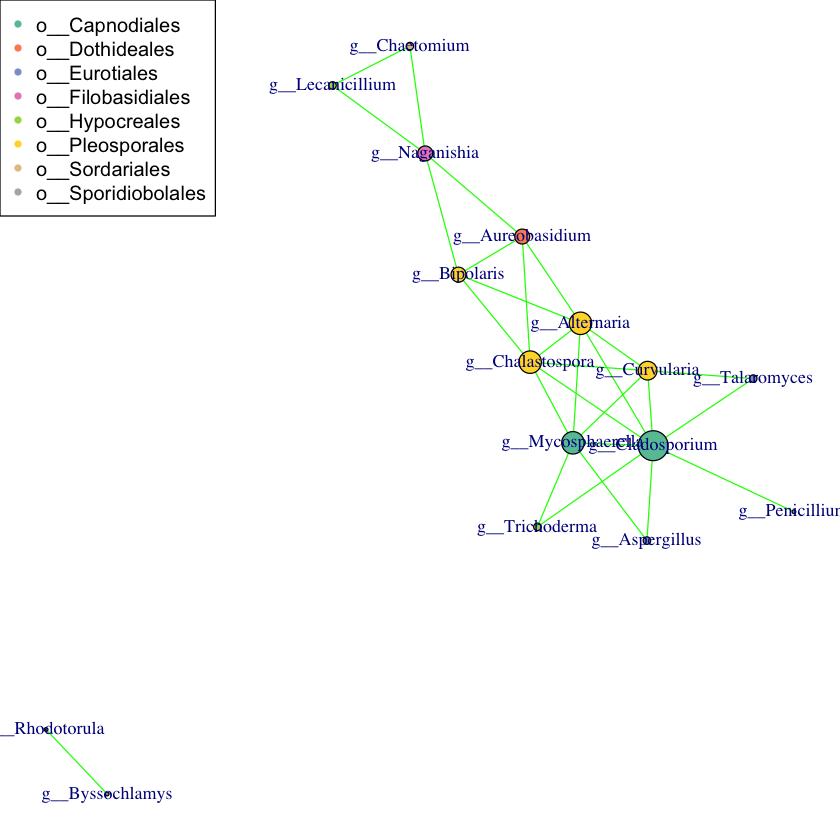

In [39]:
# create network graph from correlation matrix
nw.quan.mdf <- graph_from_adjacency_matrix(cor.quan.mdf$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.quan.mdf)$name = v.names.q.m
V(nw.quan.mdf)$size = degree(nw.quan.mdf)
E(nw.quan.mdf)$values = sig.quan.mdf
# red for negative correlation, green for positive correlation
E(nw.quan.mdf)$color <- ifelse(E(nw.quan.mdf)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(123)
#pdf('quan_mdf_correlation.pdf', width=20, height=20)
l.q.m <- layout_with_graphopt(nw.quan.mdf)
plot.igraph(nw.quan.mdf,
            layout=l.q.m, 
            vertex.label.cex=0.9,
            vertex.color=my_color.q.m)
legend(x="topleft", legend=levels(as.factor(quan.mdf.w.taxa[,18])), col = col.q.m, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

## Relative, Gypsum

In [40]:
rel.gyp = read.csv("rel-gyp-otu.csv", header = TRUE)
gyp.taxa = read.csv("gyp-taxa.csv", header = TRUE)

In [42]:
rownames(rel.gyp) = rel.gyp$X
rel.gyp = rel.gyp[,2:10]

In [45]:
rownames(gyp.taxa) = gyp.taxa$X
gyp.taxa = gyp.taxa[,2:8]

In [47]:
rel.gyp

,T1R7,T2R7,T2R9,T3R7,T3R9,T4R7,T4R9,T5R7,T5R9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SH1726759.08FU_AF444541_refs,100,0.0000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000
SH1715510.08FU_KU204769_reps,0,1.0663404,6.329676187,0.10066346,0.00000000,0.00000000,0.57124722,0.00000000,0.0000000
SH1676198.08FU_KF984792_refs,0,0.0000000,0.044418780,0.00000000,0.10209290,0.00000000,0.71934836,0.00000000,1.2162760
SH1694434.08FU_EU037063_reps,0,0.0000000,7.133656110,0.00000000,0.83375872,0.00000000,0.05289326,0.00000000,0.0000000
SH1692811.08FU_FJ430773_reps,0,26.3176296,46.875138809,8.02104782,20.94606092,7.47659731,2.36961811,6.51256412,4.5555064
SH1695393.08FU_U65307_reps,0,66.7861201,7.462355084,28.91329215,7.60592139,18.79164452,0.72992701,12.71346016,0.7076515
SH1679963.08FU_KX664387_reps,0,0.0000000,0.000000000,0.00000000,0.03403097,0.00000000,0.00000000,0.00000000,0.0000000
SH1711465.08FU_AY554212_refs,0,0.0000000,0.008883756,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000
SH1685996.08FU_AJ292429_refs,0,0.0000000,0.239861413,0.02287806,9.10328399,0.00000000,47.40294087,0.00000000,32.4413976


In [48]:
# log10(x+1) transformation
rel.gyp = log10(rel.gyp + 1)

In [49]:
# combine feature table with taxonomy
rel.gyp.w.taxa = cbind(rel.gyp, gyp.taxa)

In [50]:
rel.gyp.w.taxa

,T1R7,T2R7,T2R9,T3R7,T3R9,T4R7,T4R9,T5R7,T5R9,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
SH1726759.08FU_AF444541_refs,2.004321,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,k__Fungi,p__Basidiomycota,c__Microbotryomycetes,o__Sporidiobolales,f__Sporidiobolaceae,g__Rhodotorula,NA
SH1715510.08FU_KU204769_reps,0.000000,0.31520186,0.86508479,0.041654550,0.00000000,0.00000000,0.19624452,0.000000000,0.0000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Trichosphaeriales,f__Trichosphaeriaceae,g__Nigrospora,NA
SH1676198.08FU_KF984792_refs,0.000000,0.00000000,0.01887467,0.000000000,0.04221821,0.00000000,0.23536388,0.000000000,0.3456238,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Trichocomaceae,g__Talaromyces,NA
SH1694434.08FU_EU037063_reps,0.000000,0.00000000,0.91028581,0.000000000,0.26334219,0.00000000,0.02238435,0.000000000,0.0000000,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Thermoascaceae,g__Byssochlamys,NA
SH1692811.08FU_FJ430773_reps,0.000000,1.43644301,1.68011005,0.955256985,1.34135658,0.92822155,0.52758068,0.875788192,0.7447237,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Penicillium,NA
SH1695393.08FU_U65307_reps,0.000000,1.83114078,0.92749124,1.475864213,0.93479737,1.29648188,0.23802778,1.137147049,0.2323992,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Aspergillus,NA
SH1679963.08FU_KX664387_reps,0.000000,0.00000000,0.00000000,0.000000000,0.01453355,0.00000000,0.00000000,0.000000000,0.0000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Ophiocordycipitaceae,g__Tolypocladium,NA
SH1711465.08FU_AY554212_refs,0.000000,0.00000000,0.00384113,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.0000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Nectriaceae,g__Nalanthamala,NA
SH1685996.08FU_AJ292429_refs,0.000000,0.00000000,0.09337314,0.009823863,1.00446256,0.00000000,1.68487175,0.000000000,1.5242844,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Cordycipitaceae,g__Lecanicillium,NA


In [51]:
# Pearson correlation
cor.rel.gyp = rcorr(t(rel.gyp), type='pearson')

In [52]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices.r.g = which(abs(cor.rel.gyp$r) > 0.3 & cor.rel.gyp$P < 0.05 & lower.tri(cor.rel.gyp$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.r.g.by.row = indices.r.g[order(indices.r.g[,1]),]

sig.rel.gyp = cor.rel.gyp$r[indices.r.g.by.row]
length(sig.rel.gyp)

[1] 35

In [53]:
sig.rel.gyp

[1]  0.8607613 -0.6985160  0.6870854  0.9205787  0.9588260  0.8983374
 [7]  0.8432560  0.7137005  0.8174946  0.8919467  0.6935280  0.7589861
[13]  0.6925061  0.8860340  0.8230132  0.7590728  0.7195082  0.7290343
[19]  0.7851402  0.8407531  0.7708203  0.7275824  0.7415702  0.6755484
[25]  0.7446111  0.8821930  0.6958116  0.7688196  1.0000000  0.7290343
[31]  0.7475539  0.9158262  0.7703338  0.7475539  0.6917741

In [54]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.rel.gyp$r[which(abs(cor.rel.gyp$r) <= 0.3 & lower.tri(cor.rel.gyp$r), arr.ind=TRUE)]=0
cor.rel.gyp$r[which(cor.rel.gyp$P >= 0.05 & lower.tri(cor.rel.gyp$r), arr.ind=TRUE)]=0

In [55]:
# show vertex label in Genus level
v.names.r.g = as.vector(rel.gyp.w.taxa[,15])

In [56]:
# color vertex according to Order level
colourCount = length(unique(rel.gyp.w.taxa[,13]))
getPalette = colorRampPalette(brewer.pal(8, "Set2"))
col.r.g = getPalette(colourCount)
my_color.r.g = col.r.g[as.numeric(as.factor(rel.gyp.w.taxa[,13]))]

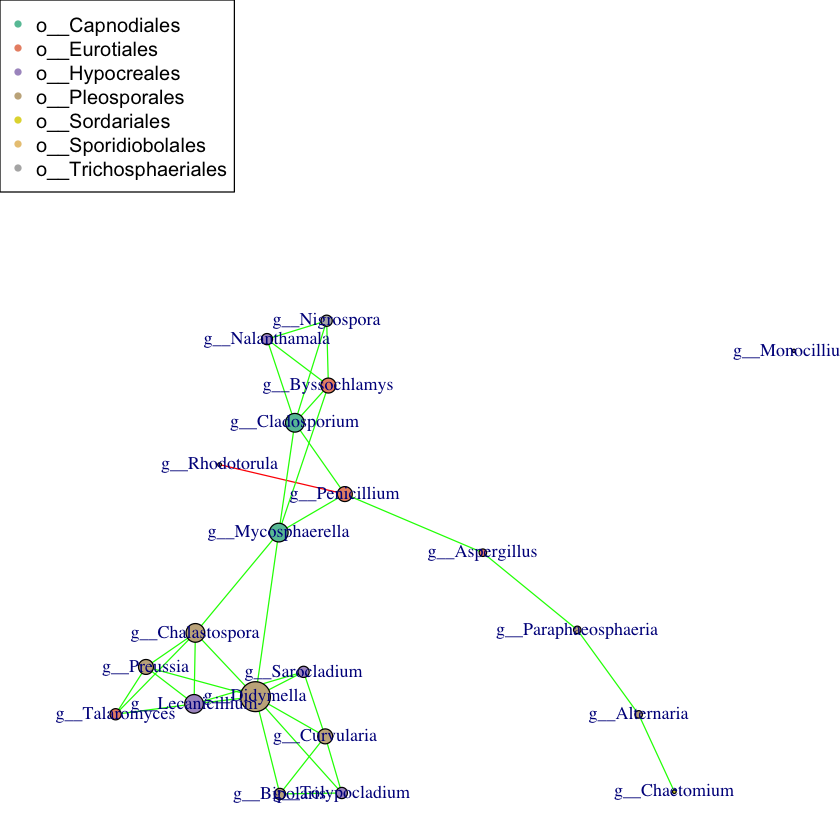

In [57]:
# create network graph from correlation matrix
nw.rel.gyp <- graph_from_adjacency_matrix(cor.rel.gyp$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.rel.gyp)$name = v.names.r.g
V(nw.rel.gyp)$size = degree(nw.rel.gyp)
E(nw.rel.gyp)$values = sig.rel.gyp
# red for negative correlation, green for positive correlation
E(nw.rel.gyp)$color <- ifelse(E(nw.rel.gyp)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(123)
#pdf('rel_gyp_correlation.pdf', width=20, height=20)
l.r.g <- layout_with_graphopt(nw.rel.gyp)
plot.igraph(nw.rel.gyp,
            layout=l.r.g, 
            vertex.label.cex=0.9,
            vertex.color=my_color.r.g)
legend(x="topleft", legend=levels(as.factor(rel.gyp.w.taxa[,13])), col = col.r.g, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

## Quantitative, Gypsum

In [59]:
quan.gyp = read.csv("quan-gyp-otu.csv", header = TRUE)

In [61]:
rownames(quan.gyp) = quan.gyp$X
quan.gyp = quan.gyp[,2:10]

In [62]:
quan.gyp

,T1R7,T2R7,T2R9,T3R7,T3R9,T4R7,T4R9,T5R7,T5R9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SH1726759.08FU_AF444541_refs,1018.769,0.00000,0.0000000,0.000,0.00000,0.000,0.00000,0.0000,0.000
SH1715510.08FU_KU204769_reps,0.000,269.61350,314.3633678,1052.313,0.00000,0.000,702.37312,0.0000,0.000
SH1676198.08FU_KF984792_refs,0.000,0.00000,2.2060587,0.000,41.10314,0.000,884.46985,0.0000,20905.413
SH1694434.08FU_EU037063_reps,0.000,0.00000,354.2930307,0.000,335.67568,0.000,65.03455,0.0000,0.000
SH1692811.08FU_FJ430773_reps,0.000,6654.14946,2328.0537689,83850.183,8432.99518,231093.209,2913.54774,223494.7772,78300.275
SH1695393.08FU_U65307_reps,0.000,16886.20260,370.6178652,302252.883,3062.18428,580828.584,897.47676,436293.8921,12163.149
SH1679963.08FU_KX664387_reps,0.000,0.00000,0.0000000,0.000,13.70105,0.000,0.00000,0.0000,0.000
SH1711465.08FU_AY554212_refs,0.000,0.00000,0.4412117,0.000,0.00000,0.000,0.00000,0.0000,0.000
SH1685996.08FU_AJ292429_refs,0.000,0.00000,11.9127171,239.162,3665.03040,0.000,58283.96170,0.0000,557604.384


In [63]:
# log10(x+1) transformation
quan.gyp <- log10(quan.gyp + 1)

In [64]:
# combine feature table with taxonomy
quan.gyp.w.taxa <- cbind(quan.gyp, gyp.taxa)

In [65]:
quan.gyp.w.taxa

,T1R7,T2R7,T2R9,T3R7,T3R9,T4R7,T4R9,T5R7,T5R9,Kingdom,Phylum,Class,Order,Family,Genus,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
SH1726759.08FU_AF444541_refs,3.008502,0.000000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Fungi,p__Basidiomycota,c__Microbotryomycetes,o__Sporidiobolales,f__Sporidiobolaceae,g__Rhodotorula,NA
SH1715510.08FU_KU204769_reps,0.000000,2.432349,2.4988112,3.022557,0.000000,0.000000,2.847186,0.000000,0.000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Trichosphaeriales,f__Trichosphaeriaceae,g__Nigrospora,NA
SH1676198.08FU_KF984792_refs,0.000000,0.000000,0.5059715,0.000000,1.624315,0.000000,2.947174,0.000000,4.320280,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Trichocomaceae,g__Talaromyces,NA
SH1694434.08FU_EU037063_reps,0.000000,0.000000,2.5505867,0.000000,2.527212,0.000000,1.819771,0.000000,0.000000,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Thermoascaceae,g__Byssochlamys,NA
SH1692811.08FU_FJ430773_reps,0.000000,3.823158,3.3671795,4.923509,3.926033,5.363789,3.464571,5.349269,4.893769,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Penicillium,NA
SH1695393.08FU_U65307_reps,0.000000,4.227558,2.5700966,5.480372,3.486173,5.764049,2.953507,5.639780,4.085082,k__Fungi,p__Ascomycota,c__Eurotiomycetes,o__Eurotiales,f__Aspergillaceae,g__Aspergillus,NA
SH1679963.08FU_KX664387_reps,0.000000,0.000000,0.0000000,0.000000,1.167348,0.000000,0.000000,0.000000,0.000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Ophiocordycipitaceae,g__Tolypocladium,NA
SH1711465.08FU_AY554212_refs,0.000000,0.000000,0.1587278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Nectriaceae,g__Nalanthamala,NA
SH1685996.08FU_AJ292429_refs,0.000000,0.000000,1.1110176,2.380504,3.564196,0.000000,4.765557,0.000000,5.746327,k__Fungi,p__Ascomycota,c__Sordariomycetes,o__Hypocreales,f__Cordycipitaceae,g__Lecanicillium,NA


In [66]:
# Pearson correlation
cor.quan.gyp = rcorr(t(quan.gyp), type='pearson')

In [67]:
# extract significant values: abs(r)>0.3 & P < 0.05
indices.q.g = which(abs(cor.quan.gyp$r) > 0.3 & cor.quan.gyp$P < 0.05 & lower.tri(cor.quan.gyp$r),arr.ind=TRUE)
# order index by row, in the same order as graph edges
indices.q.g.by.row = indices.q.g[order(indices.q.g[,1]),]

sig.quan.gyp = cor.quan.gyp$r[indices.q.g.by.row]
length(sig.quan.gyp)

[1] 33

In [68]:
sig.quan.gyp

[1] -0.8828409 -0.7744219  0.9569149  0.9281510 -0.8443686  0.9869757
 [7]  0.9352157 -0.8689614  0.9587893  0.8572780  0.7129239  0.9785452
[13]  0.9811457  0.9143639  0.7892127  0.9265368  0.9050560  0.9531123
[19] -0.6994710  0.7869726  0.8890662  0.7979407  0.7659547  0.7926035
[25]  0.9828422 -0.6905132  1.0000000  0.8797774  0.8762690  0.7011887
[31]  0.9260659  0.8923061  0.6853609

In [69]:
# set all other values to 0 because we only want to show significant edges on a correlation plot
cor.quan.gyp$r[which(abs(cor.quan.gyp$r) <= 0.3 & lower.tri(cor.quan.gyp$r), arr.ind=TRUE)]=0
cor.quan.gyp$r[which(cor.quan.gyp$P >= 0.05 & lower.tri(cor.quan.gyp$r), arr.ind=TRUE)]=0

In [70]:
# show vertex label in Genus level
v.names.q.g = as.vector(quan.gyp.w.taxa[,15])

In [71]:
# color vertex according to Order level
colourCount = length(unique(quan.gyp.w.taxa[,13]))
getPalette = colorRampPalette(brewer.pal(8, "Set2"))
col.q.g = getPalette(colourCount)
my_color.q.g = col.q.g[as.numeric(as.factor(quan.gyp.w.taxa[,13]))]

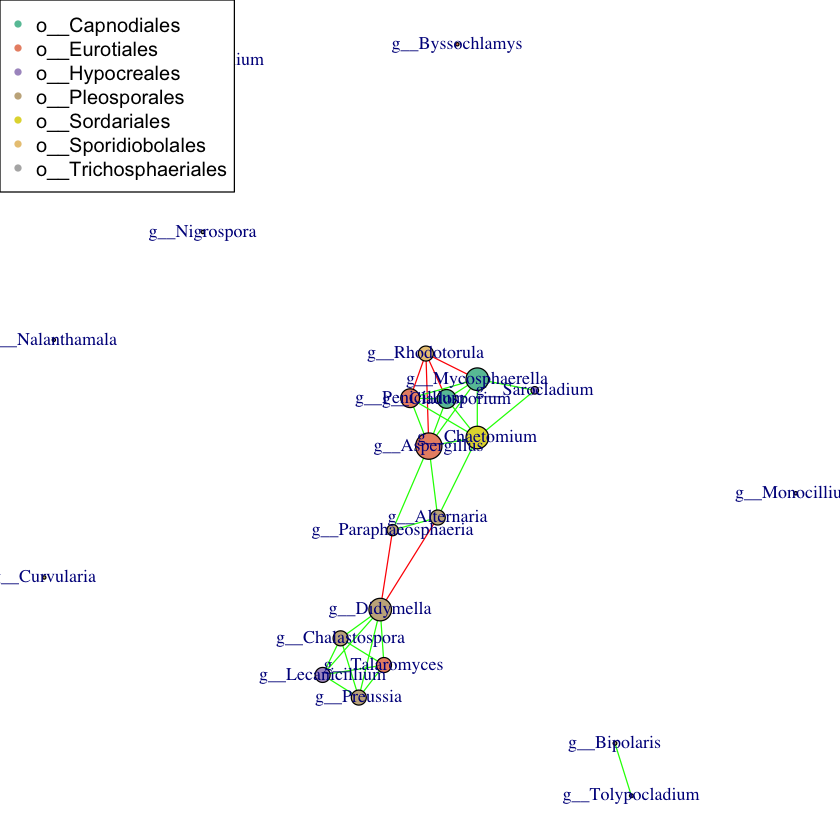

In [72]:
# create network graph from correlation matrix
nw.quan.gyp <- graph_from_adjacency_matrix(cor.quan.gyp$r, weighted=T, mode="lower", diag=F)
# only show vertexes that have significant values
V(nw.quan.gyp)$name = v.names.q.g
V(nw.quan.gyp)$size = degree(nw.quan.gyp)
E(nw.quan.gyp)$values = sig.quan.gyp
# red for negative correlation, green for positive correlation
E(nw.quan.gyp)$color <- ifelse(E(nw.quan.gyp)$values > 0,'#00FF00','#FF0000')

par(bg="white", mar=c(0,0,0,0))
set.seed(123)
#pdf('quan_gyp_correlation.pdf', width=20, height=20)
l.q.g <- layout_with_graphopt(nw.quan.gyp)
plot.igraph(nw.quan.gyp,
            layout=l.q.g, 
            vertex.label.cex=0.9,
            vertex.color=my_color.q.g)
legend(x="topleft", legend=levels(as.factor(quan.gyp.w.taxa[,13])), col = col.q.g, pch=20, cex = 1, text.col="black", horiz = F)
#dev.off()

## Correlation Matrix Visualization

### MDF

In [82]:
mdf.rel.quan = lowerUpper(t(cor.rel.mdf$r), cor.quan.mdf$r)

In [83]:
rownames(mdf.rel.quan) = v.names.r.m
colnames(mdf.rel.quan) = v.names.r.m

In [86]:
pdf('mdf_correlation_matrix.pdf', width=30, height=30)
corrplot(mdf.rel.quan, method="circle", tl.col="black", na.label="square", na.label.col="gray", tl.srt=45, tl.cex=2.0)
dev.off()

pdf 
  2

### Gypsum

In [87]:
gyp.rel.quan = lowerUpper(t(cor.rel.gyp$r), cor.quan.gyp$r)

In [88]:
rownames(gyp.rel.quan) = v.names.r.g
colnames(gyp.rel.quan) = v.names.r.g

In [91]:
pdf('gyp_correlation_matrix.pdf', width=30, height=30)
corrplot(gyp.rel.quan, method="circle", tl.col="black", na.label="square", na.label.col="gray", tl.srt=45, tl.cex=2.0)
dev.off()

pdf 
  2